# Part 10 

## # Dataset

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist

%matplotlib inline

In [76]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [77]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [78]:
_height, _width, _channels = 28, 28, 1

In [79]:
xtrain = xtrain.reshape(xtrain.shape[0], _height, _width, _channels).astype('float32')
xtrain.shape

(60000, 28, 28, 1)

In [80]:
xtest = xtest.reshape(xtest.shape[0], _height, _width, _channels).astype('float32')
xtest.shape

(10000, 28, 28, 1)

Text(0.5, 1.0, 'Class: 8')

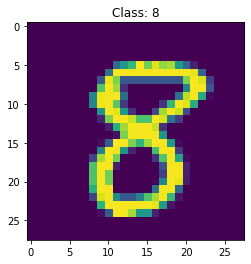

In [81]:
_i = 333
plt.imshow(xtrain[_i])
plt.title(f'Class: {ytrain[_i]}')

In [82]:
xtrain /= 255
xtest /= 255

In [83]:
ytrain = np_utils.to_categorical(ytrain, max(ytrain) + 1)
ytrain.shape

(60000, 10)

In [84]:
ytest = np_utils.to_categorical(ytest, max(ytest) + 1)
ytest.shape

(10000, 10)

## # Model

In [105]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.backend import clear_session
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [117]:
def model():
    clear_session()
    
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
              input_shape=(_height, _width, _channels)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    print(model.summary())
    
    return model

In [118]:
clf = model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
None


In [121]:
clf.fit(x=xtrain, y=ytrain, validation_data=(xtest, ytest), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0145 - accuracy: 0.9956 - val_loss: 0.0446 - val_accuracy: 0.9872
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.0530 - val_accuracy: 0.9860
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0085 - accuracy: 0.9971 - val_loss: 0.0561 - val_accuracy: 0.9858
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0069 - accuracy: 0.9974 - val_loss: 0.0530 - val_accuracy: 0.9867
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.0536 - val_accuracy: 0.9876


## # Evaluation

In [122]:
from sklearn.metrics import classification_report

In [123]:
pred = clf.predict(xtest) >= 0.5

In [124]:
_ = classification_report(ytest, pred)
print(_)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.97      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



/home/hbrandao/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ## Minor improvement

In [104]:
from keras.layers.normalization import BatchNormalization

In [ ]:
def model_improved():
    clear_session()
    
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
              input_shape=(_height, _width, _channels)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())

    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(rate=0.25))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(rate=0.25))

    model.add(Dense(units=10, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    print(model.summary())
    
    return model

In [107]:
clf_improved = model_improved()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0

In [108]:
clf_improved.fit(x=xtrain, y=ytrain, validation_data=(xtest, ytest), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1629 - accuracy: 0.9513 - val_loss: 0.0452 - val_accuracy: 0.9864
Epoch 2/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0694 - accuracy: 0.9798 - val_loss: 0.0365 - val_accuracy: 0.9884
Epoch 3/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0553 - accuracy: 0.9845 - val_loss: 0.0392 - val_accuracy: 0.9880
Epoch 4/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0460 - accuracy: 0.9869 - val_loss: 0.0422 - val_accuracy: 0.9881
Epoch 5/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0373 - accuracy: 0.9886 - val_loss: 0.0326 - val_accuracy: 0.9913
Epoch 6/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0358 - accuracy: 0.9897 - val_loss: 0.0269 - val_accuracy: 0.9917
Epoch 7/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0295 - accuracy: 0.9911 - val_loss: 0.0555 -

In [109]:
pred_improved = clf_improved.predict(xtest) >= 0.5

In [110]:
_ = classification_report(ytest, pred_improved)
print(_)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



/home/hbrandao/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ## Data Augumentation

In [125]:
from keras.preprocessing.image import ImageDataGenerator

In [127]:
imgdatagen = ImageDataGenerator(rotation_range=7,
                               horizontal_flip=True,
                               shear_range=0.2,
                               height_shift_range=0.07,
                               zoom_range=0.2)

In [129]:
xtrain_gen = imgdatagen.flow(x=xtrain, y=ytrain)
xtrain_gen

In [131]:
clf.fit(x=xtrain_gen, validation_data=(xtest, ytest), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1181 - accuracy: 0.9639 - val_loss: 0.0627 - val_accuracy: 0.9810
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0970 - accuracy: 0.9697 - val_loss: 0.0620 - val_accuracy: 0.9811
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0824 - accuracy: 0.9738 - val_loss: 0.0520 - val_accuracy: 0.9825
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0785 - accuracy: 0.9755 - val_loss: 0.0478 - val_accuracy: 0.9853
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0711 - accuracy: 0.9780 - val_loss: 0.0473 - val_accuracy: 0.9851


In [132]:
pred = clf.predict(xtest) >= 0.5

In [133]:
_ = classification_report(ytest, pred)
print(_)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

   micro avg       0.99      0.98      0.98     10000
   macro avg       0.99      0.98      0.98     10000
weighted avg       0.99      0.98      0.98     10000
 samples avg       0.98      0.98      0.98     10000



/home/hbrandao/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
